https://www.kaggle.com/c/quora-question-pairs

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 15

In [3]:
import pickle
from tqdm import tqdm
from IPython.display import clear_output

# Data

In [4]:
train = pd.read_csv('../[Data]-Quora-Question-Pairs/train.csv')

In [5]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate,Jaccard,Fuzz Ratio,Fuzz Partial Ratio,Fuzz Token Sort Ratio,Fuzz Token Set Ratio
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,83.333333,92,100,92,100
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,36.363636,59,94,59,89
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,22.222222,55,46,65,65
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,0.000000,23,29,23,25
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,16.666667,26,52,42,51


In [6]:
print(f'Dataset shape : {train.shape}')
print(train.info())

Dataset shape : (404290, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 11 columns):
id                       404290 non-null int64
qid1                     404290 non-null int64
qid2                     404290 non-null int64
question1                404289 non-null object
question2                404288 non-null object
is_duplicate             404290 non-null int64
Jaccard                  404290 non-null float64
Fuzz Ratio               404290 non-null int64
Fuzz Partial Ratio       404290 non-null int64
Fuzz Token Sort Ratio    404290 non-null int64
Fuzz Token Set Ratio     404290 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 33.9+ MB
None


Class Distribution


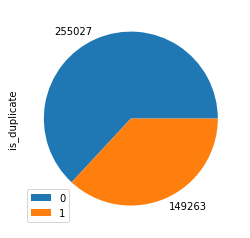

In [7]:
print('Class Distribution')
class_distribution = train['is_duplicate'].value_counts()
class_distribution.plot.pie(labels=class_distribution)
plt.legend(class_distribution.index)

In [8]:
qids = pd.Series(train['qid1'].tolist() + train['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print (f'Total number of  Unique Questions are: {unique_qs}')

print (f'Number of unique questions that appear more than one time: {qs_morethan_onetime} ({qs_morethan_onetime/unique_qs*100}%)')

print (f'Max number of times a single question is repeated: {max(qids.value_counts())}') 

Total number of  Unique Questions are: 537933
Number of unique questions that appear more than one time: 111780 (20.77953945937505%)
Max number of times a single question is repeated: 157


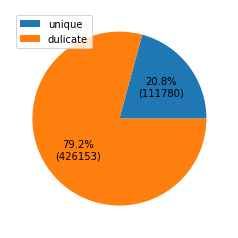

In [9]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))
data = [111780, 426153]
labels = ['unique', 'dulicate']
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)
ax.pie(data, autopct=lambda pct: func(pct, data))
ax.legend(labels)

In [21]:
train.describe()

,id,qid1,qid2,is_duplicate,Jaccard,Fuzz Ratio,Fuzz Partial Ratio,Fuzz Token Sort Ratio,Fuzz Token Set Ratio
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198,39.182791,59.991261,69.345571,63.014111,73.316454
std,116708.614503,157751.700002,159903.182629,0.482588,27.697872,23.138874,21.581851,21.845215,23.669998
min,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000,18.181818,42.000000,53.000000,48.000000,58.000000
50%,202144.500000,192182.000000,197052.000000,0.000000,33.333333,60.000000,70.000000,64.000000,78.000000
75%,303216.750000,346573.500000,354692.500000,1.000000,60.000000,79.000000,87.000000,80.000000,94.000000
max,404289.000000,537932.000000,537933.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Maximum number of times a single question is repeated: 157



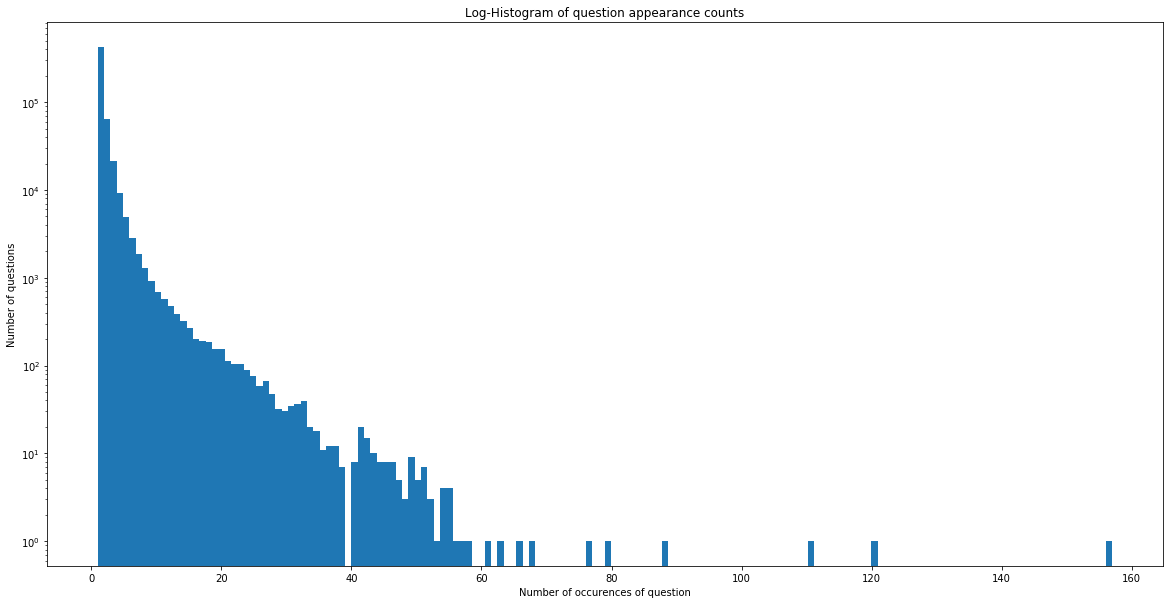

In [10]:
plt.figure(figsize=(20, 10))
plt.hist(qids.value_counts(), bins=160)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

In [11]:
test = pd.read_csv('../[Data]-Quora-Question-Pairs/test.csv')

In [12]:
test.head()

,test_id,question1,question2,Jaccard,Fuzz Ratio,Fuzz Partial Ratio,Fuzz Token Sort Ratio
0,0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?,25.000000,31,56,56
1,1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?,57.142857,53,55,74
2,2,What but is the best way to send money from China to the US?,What you send money to China?,60.000000,78,100,78
3,3,Which food not emulsifiers?,What foods fibre?,0.000000,59,55,59
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,66.666667,68,100,68


In [13]:
print(f'Dataset shape : {test.shape}')
print(test.info())

Dataset shape : (2345796, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 7 columns):
test_id                  int64
question1                object
question2                object
Jaccard                  float64
Fuzz Ratio               int64
Fuzz Partial Ratio       int64
Fuzz Token Sort Ratio    int64
dtypes: float64(1), int64(4), object(2)
memory usage: 125.3+ MB
None


In [22]:
test.describe()

,test_id,Jaccard,Fuzz Ratio,Fuzz Partial Ratio,Fuzz Token Sort Ratio,Fuzz Token Set Ratio
count,2.345796e+06,2.345796e+06,2.345796e+06,2.345796e+06,2.345796e+06,2.345796e+06
mean,1.172898e+06,2.464228e+01,4.742607e+01,5.899389e+01,5.028367e+01,6.064068e+01
std,6.771731e+05,2.075722e+01,2.015959e+01,2.072624e+01,1.971516e+01,2.460596e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.864488e+05,9.090909e+00,3.200000e+01,4.400000e+01,3.700000e+01,4.300000e+01
50%,1.172898e+06,2.000000e+01,4.600000e+01,5.800000e+01,5.100000e+01,6.200000e+01
75%,1.759346e+06,3.636364e+01,6.200000e+01,7.300000e+01,6.400000e+01,7.900000e+01
max,2.345795e+06,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


# Data Cleaning

In [14]:
print('Merging all questions')
all_question = pd.concat([train['question1'], train['question2'], test['question1'], test['question2']], axis=0)
all_question = all_question.reset_index(drop=True)
all_question.head()

Merging all questions


0    What is the step by step guide to invest in share market in india?          
1    What is the story of Kohinoor (Koh-i-Noor) Diamond?                         
2    How can I increase the speed of my internet connection while using a VPN?   
3    Why am I mentally very lonely? How can I solve it?                          
4    Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
dtype: object

In [15]:
import nltk, re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def spell_correct(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\0s", "0", text)    
    return text

def remove_url(text):
    URL_REGEX = re.compile(r'''((http[s]?://)[^ <>'"{}|\\^`[\]]*)''')
    return URL_REGEX.sub(r' ', text)

def remove_handles(text):
    HANDLES_REGEX = re.compile(r'@\S+')
    return HANDLES_REGEX.sub(r' ', text)

def remove_incomplete_last_word(text):
    INCOMPLETE_LAST_WORD_REGEX = re.compile(r'\S+…')
    return INCOMPLETE_LAST_WORD_REGEX.sub(r' ', text )
    
def remove_hashtags(text):
    HASHTAGS_REGEX = re.compile(r'#\S+')
    return HASHTAGS_REGEX.sub(r' ', text)

remove_punc = lambda x : re.sub(r"\W", ' ', x)

remove_num = lambda x : re.sub(r"\d", ' ', x)

remove_extra_spaces = lambda x : re.sub(r"\s+", ' ', x)

lower_case = lambda x : x.lower()

remove_shortwords = lambda x: ' '.join(word for word in x.split() if len(word) > 2)

with open('stopwords.txt') as f:
    sw = map(lambda x : x.strip(), f.readlines())
stop_words = set(nltk.corpus.stopwords.words('english'))|set(sw)
remove_stopwords = lambda x: ' '.join(word for word in x.split() if word not in stop_words)

ps = PorterStemmer()
ps_stem = lambda x: ' '.join(ps.stem(word) for word in x.split())

wnl = WordNetLemmatizer()
wnl_lemmatize = lambda x: ' '.join(wnl.lemmatize(word) for word in x.split())

def tag_pos(x):
    tag_list =  nltk.pos_tag(nltk.word_tokenize(x))
    pos = ""
    for t in tag_list:
        pos += t[0] +'(' + t[1] +')' + ' '
    return pos

def cleanText(x, rsw, stm, lem, tgps):
    x = str(x)
    x = remove_url(x)
    x = remove_handles(x)
    x = remove_incomplete_last_word(x)
    x = remove_hashtags(x)
    x = lower_case(x)
    x = spell_correct(x)
    x = remove_punc(x)
    x = remove_num(x)
    x = remove_extra_spaces(x)
    x = remove_shortwords(x)
    
    if rsw:
        x = remove_stopwords(x)
    if stm:
        x = ps_stem(x)
    if lem:
        x = wnl_lemmatize(x)
    if tgps:
        x = tag_pos(x)
    return x

In [16]:
tqdm.pandas()
all_question = all_question.progress_apply(lambda x : cleanText(x, True, False, False, False))

100%|█████████████████████████████████████████████████████████████████████| 5500172/5500172 [07:27<00:00, 12284.16it/s]


In [17]:
train_q1 = all_question[:404290]
train_q2 = all_question[404290:2*404290].reset_index(drop=True)
test_q1 = all_question[2*404290:2*404290+2345796].reset_index(drop=True)
test_q2 = all_question[2*404290+2345796:].reset_index(drop=True)

# Basic Feature Extraction
* Jaccard Similarity
* Fuzz Ratio
* Fuzz Partial Ratio
* Fuzz Token Sort Ratio
* Fuzz Token Set Ratio

**Jaccard Similarity**

In [18]:
def jaccard_similarity(q1, q2):
    q1 = set(q1.split())
    q2 = set(q2.split())
    try:
        return (len(q1&q2)/len(q1|q2))*100
    except:
        return 0

In [19]:
jaccard_train = []
i=1
for q1, q2 in zip(train_q1, train_q2):
    print(f'{i:{6}}/ 404290')
    i+=1
    jaccard_train.append(jaccard_similarity(q1, q2))
    clear_output(wait=True)
train['Jaccard'] = jaccard_train

404272/ 404290

In [26]:
jaccard_test = []
i=1
for q1, q2 in zip(test_q1, test_q2):
    print(f'{i:{7}}/ 2345796')
    i+=1
    jaccard_test.append(jaccard_similarity(q1, q2))
    clear_output(wait=True)
test['Jaccard'] = jaccard_test

2345796/ 2345796


**Fuzzy String Matching**

In [18]:
from fuzzywuzzy import fuzz

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


**Fuzz Ratio**

In [21]:
f_ratio_train = []
i=1
for q1, q2 in zip(train_q1, train_q2):
    print(f'{i:{6}}/ 404290')
    i+=1
    try:
        f_ratio_train.append(fuzz.ratio(q1, q2))
    except:
        f_ratio_train.append(0)
    clear_output(wait=True)
train['Fuzz Ratio'] = f_ratio_train

404228/ 404290

In [27]:
f_ratio_test = []
i=1
for q1, q2 in zip(test_q1, test_q2):
    print(f'{i:{7}}/ 2345796')
    i+=1
    try:
        f_ratio_test.append(fuzz.ratio(q1, q2))
    except:
        f_ratio_test.append(0)
    clear_output(wait=True)
test['Fuzz Ratio'] = f_ratio_test

2345786/ 2345796


**Fuzz Partial Ratio**

In [22]:
f_partial_ratio_train = []
i=1
for q1, q2 in zip(train_q1, train_q2):
    print(f'{i:{6}}/ 404290')
    i+=1
    try:
        f_partial_ratio_train.append(fuzz.partial_ratio(q1, q2))
    except:
        f_partial_ratio_train.append(0)
    clear_output(wait=True)
train['Fuzz Partial Ratio'] = f_partial_ratio_train

404081/ 404290


In [28]:
f_partial_ratio_test = []
i=1
for q1, q2 in zip(test_q1, test_q2):
    print(f'{i:{7}}/ 2345796')
    i+=1
    try:
        f_partial_ratio_test.append(fuzz.partial_ratio(q1, q2))
    except:
        f_partial_ratio_test.append(0)
    clear_output(wait=True)
test['Fuzz Partial Ratio'] = f_partial_ratio_test

2345659/ 2345796


**Fuzz Token Sort Ratio**

In [23]:
f_token_sort_ratio_train = []
i=1
for q1, q2 in zip(train_q1, train_q2):
    print(f'{i:{6}}/ 404290')
    i+=1
    try:
        f_token_sort_ratio_train.append(fuzz.token_sort_ratio(q1, q2))
    except:
        f_token_sort_ratio_train.append(0)
    clear_output(wait=True)
train['Fuzz Token Sort Ratio'] = f_token_sort_ratio_train

404290/ 404290


In [29]:
f_token_sort_ratio_test = []
i=1
for q1, q2 in zip(test_q1, test_q2):
    print(f'{i:{7}}/ 2345796')
    i+=1
    try:
        f_token_sort_ratio_test.append(fuzz.token_sort_ratio(q1, q2))
    except:
        f_token_sort_ratio_test.append(0)
    clear_output(wait=True)
test['Fuzz Token Sort Ratio'] = f_token_sort_ratio_test

2345796/ 2345796


**Fuzz Token Set Ratio**

In [24]:
f_token_set_ratio_train = []
i=1
for q1, q2 in zip(train_q1, train_q2):
    print(f'{i:{6}}/ 404290')
    i+=1
    try:
        f_token_set_ratio_train.append(fuzz.token_set_ratio(q1, q2))
    except:
        f_token_set_ratio_train.append(0)
    clear_output(wait=True)
train['Fuzz Token Set Ratio'] = f_token_set_ratio_train

403963/ 404290


In [19]:
f_token_set_ratio_test = []
i=1
for q1, q2 in zip(test_q1, test_q2):
    print(f'{i:{7}}/ 2345796')
    i+=1
    try:
        f_token_set_ratio_test.append(fuzz.token_set_ratio(q1, q2))
    except:
        f_token_set_ratio_test.append(0)
    clear_output(wait=True)
test['Fuzz Token Set Ratio'] = f_token_set_ratio_test

2345796/ 2345796


In [20]:
train.to_csv('../[Data]-Quora-Question-Pairs/train.csv', index=False)
test.to_csv('../[Data]-Quora-Question-Pairs/test.csv', index=False)

# Visualizations

is_duplicate
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Jaccard, dtype: object

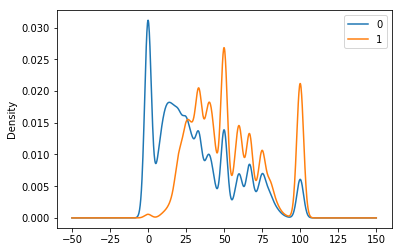

In [23]:
train.groupby('is_duplicate')['Jaccard'].plot(kind='density', legend=True)

is_duplicate
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fuzz Ratio, dtype: object

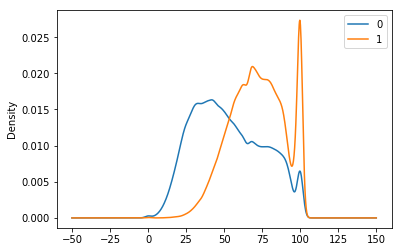

In [24]:
train.groupby('is_duplicate')['Fuzz Ratio'].plot(kind='density', legend=True)

is_duplicate
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fuzz Partial Ratio, dtype: object

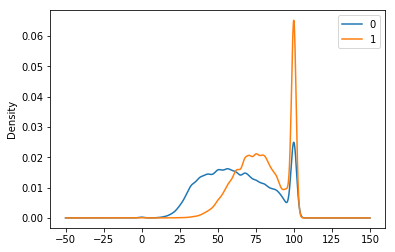

In [25]:
train.groupby('is_duplicate')['Fuzz Partial Ratio'].plot(kind='density', legend=True)

is_duplicate
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fuzz Token Sort Ratio, dtype: object

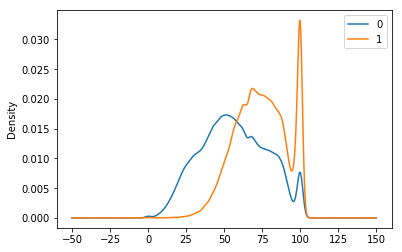

In [26]:
train.groupby('is_duplicate')['Fuzz Token Sort Ratio'].plot(kind='density', legend=True)

is_duplicate
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fuzz Token Set Ratio, dtype: object

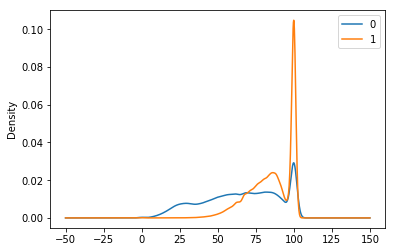

In [27]:
train.groupby('is_duplicate')['Fuzz Token Set Ratio'].plot(kind='density', legend=True)

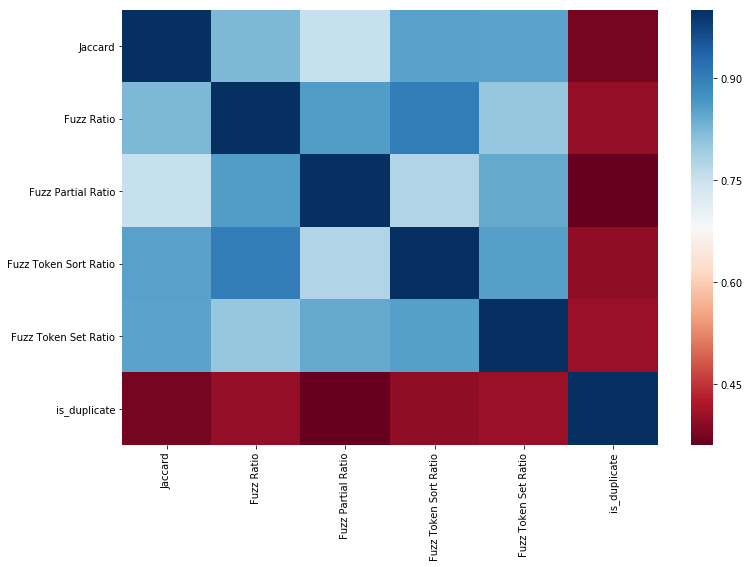

In [32]:
ax = plt.subplots(figsize=(12,8))
sns.heatmap(train[['Jaccard', 'Fuzz Ratio', 'Fuzz Partial Ratio', 'Fuzz Token Sort Ratio', 'Fuzz Token Set Ratio', 'is_duplicate']].corr(), cmap='RdBu')

# Data Preparation

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train[['Jaccard', 'Fuzz Ratio', 'Fuzz Partial Ratio', 
                                                    'Fuzz Token Sort Ratio', 'Fuzz Token Set Ratio']], train['is_duplicate'])

# Machine Learning

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression(penalty='l1', C=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[48923 18184]
 [14888 19078]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     67107
           1       0.51      0.56      0.54     33966

   micro avg       0.67      0.67      0.67    101073
   macro avg       0.64      0.65      0.64    101073
weighted avg       0.68      0.67      0.68    101073



In [44]:
model = LogisticRegression()
model.fit(train[['Jaccard', 'Fuzz Ratio', 'Fuzz Partial Ratio', 'Fuzz Token Sort Ratio', 'Fuzz Token Set Ratio']],train['is_duplicate'])
y_pred = model.predict(test[['Jaccard', 'Fuzz Ratio', 'Fuzz Partial Ratio', 'Fuzz Token Sort Ratio', 'Fuzz Token Set Ratio']])
submission = pd.read_csv('../[Data]-Quora-Question-Pairs/sample_submission.csv')
submission['is_duplicate'] = y_pred
submission.to_csv('../[Data]-Quora-Question-Pairs/LR-FeatExt.csv', index=False)

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
